In [3]:
import pandas as pd

**Import csv**

In [4]:
label_file_india = "./india_BMI.csv"
label_file_holly = "vip/annotation.csv"
label_file_prison = "images/output.csv"

In [5]:
india_df = pd.read_csv(label_file_india)
holly_df = pd.read_csv(label_file_holly)
prison_df = pd.read_csv(label_file_prison)

<strong>Images Datasets</strong>

In [6]:
from glob import glob
from pathlib import Path as p

<strong>Get Image Path Fuction</strong>

In [7]:
def get_index_of_digit(string):
    import re
    match = re.search("\d", p(string).stem)
    return match.start(0)

In [8]:
data_folder_india = "india_images"
data_folder_holly = "vip/data"
data_folder_prison = "images"

<strong>Get India Images</strong>

In [9]:
india_files = glob(data_folder_india+"/*")
india_jpgs = sorted([img for img in india_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("India Total {} photos ".format(len(india_jpgs)))

India Total 226 photos 


In [10]:
ind_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in india_jpgs ]
ind_image_df = pd.DataFrame(ind_path,columns=['UID','path'])
# print(ind_image_df)
ind_data_df = ind_image_df.merge(india_df)
# ind_data_df
ind_data_df = ind_data_df.drop(columns=['UID', 'id','name'])
ind_data_df

path  height  weight        BMI
0    india_images/akshay1.jpeg    1.78      80  25.249337
1    india_images/akshay10.jpg    1.78      80  25.249337
2    india_images/akshay11.jpg    1.78      80  25.249337
3    india_images/akshay12.jpg    1.78      80  25.249337
4    india_images/akshay13.jpg    1.78      80  25.249337
..                         ...     ...     ...        ...
221    india_images/vikky5.jpg    1.83      80  23.888441
222    india_images/vikky6.jpg    1.83      80  23.888441
223    india_images/vikky7.jpg    1.83      80  23.888441
224    india_images/vikky8.jpg    1.83      80  23.888441
225    india_images/vikky9.jpg    1.83      80  23.888441

[226 rows x 4 columns]

<strong>Get Hollywood Images</strong>

In [11]:
holly_files = glob(data_folder_holly+"/*")
holly_jpgs = sorted([img for img in holly_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("Hollywood Total {} photos ".format(len(holly_jpgs)))

Hollywood Total 1026 photos 


In [12]:
hol_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in holly_jpgs ]
hol_image_df = pd.DataFrame(hol_path,columns=['UID','path'])
# print(hol_image_df)
hol_data_df = pd.concat( [hol_image_df, holly_df], axis=1 )
# hol_data_df
hol_data_df = hol_data_df.drop(columns=['UID', 'image'])
hol_data_df

path  height  weight        BMI
0     vip/data/f_001.jpg    1.55    61.0  25.390219
1     vip/data/f_002.jpg    1.76    85.0  27.440599
2     vip/data/f_003.jpg    1.78    56.0  17.674536
3     vip/data/f_004.jpg    1.63    63.0  23.711845
4     vip/data/f_005.jpg    1.76    54.0  17.432851
...                  ...     ...     ...        ...
1021  vip/data/m_509.jpg    1.91   116.0  31.797374
1022  vip/data/m_510.jpg    1.93   111.0  29.799458
1023  vip/data/m_511.jpg    1.88   109.0  30.839746
1024  vip/data/m_512.jpg    1.78    75.0  23.671254
1025  vip/data/m_513.jpg    2.21   137.0  28.050204

[1026 rows x 4 columns]

<strong>Get Prison Images</strong>

In [13]:
prison_files = glob(data_folder_prison+"/*")
prison_jpgs = sorted([img for img in prison_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("Prison Total {} photos ".format(len(prison_jpgs)))

Prison Total 301 photos 


In [14]:
pri_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in prison_jpgs ]
pri_image_df = pd.DataFrame(pri_path,columns=['UID','path'])
# print(hol_image_df)
pri_data_df = pd.concat( [pri_image_df, prison_df], axis=1 )
# pri_data_df
pri_data_df = pri_data_df.drop(columns=['Unnamed: 0', 'UID'])
pri_data_df

path  height      weight        BMI
0      images/1.jpg  1.7780   79.378665  25.109628
1     images/10.jpg  1.8288   95.254398  28.480828
2    images/100.jpg  1.6764   61.688562  21.950749
3    images/101.jpg  1.7780   63.502932  20.087702
4    images/102.jpg  1.7780   72.574779  22.957374
..              ...     ...         ...        ...
296   images/95.jpg  1.8796  115.666054  32.739727
297   images/96.jpg  1.8034   63.502932  19.525836
298   images/97.jpg  1.8034   63.502932  19.525836
299   images/98.jpg  1.8034   63.502932  19.525836
300   images/99.jpg  1.7272   63.502932  21.286709

[301 rows x 4 columns]

## Extract face embedding using facenet pretrained architecture

In [15]:
import face_recognition
import numpy as np

<strong>Define Face Recognition Function</strong>

In [16]:
def get_face_encoding(image_path):
    print(image_path, end = "")
    try:  
        picture_of_me = face_recognition.load_image_file(image_path)
        my_face_encoding = face_recognition.face_encodings(picture_of_me)
        if not my_face_encoding:
            print("  =====>  No face found!!!")
            return np.zeros(128).tolist(), 0
        print("  =====>  OK!!!")
        return my_face_encoding[0].tolist(), 1
    except(OSError, NameError):
        print('  =====>  OSError, Path:',image_path)
        return np.zeros(128).tolist(), 0

**Define dlib function**

In [17]:
import cv2
import dlib

def getEyesCenter(p1, p2, p3, p4):
    x1 = p1[0]
    x2 = p2[0]
    x3 = p3[0]
    x4 = p4[0]
    y1 = p1[1]
    y2 = p2[1]
    y3 = p3[1]
    y4 = p4[1]
    x = (x1+x2+x3+x4)/4
    y = (y1+y2+y3+y4)/4
    return x, y



def getPointsDistance(x1, y1, x2, y2):
    return np.sqrt(np.square(x1-x2)+np.square(y1-y2))


def faceDistance(path):
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    rects = detector(img_gray, 0)
    chinDis = 0
    eyesDis = 0
    
    for i in range(len(rects)):
        landmarks = np.matrix([[p.x, p.y] for p in predictor(img,rects[i]).parts()]) 
        landmarks = np.array(landmarks)
        chinDis = getPointsDistance(landmarks[4][0], landmarks[4][1], landmarks[12][0], landmarks[12][1])
        leftEyesX, leftEyesY = getEyesCenter(landmarks[37], landmarks[38], landmarks[40], landmarks[41])
        rightEyesX, rightEyesY = getEyesCenter(landmarks[43], landmarks[44], landmarks[46], landmarks[48])
        eyesDis = getPointsDistance(leftEyesX, leftEyesY, rightEyesX, rightEyesY)
    return chinDis, eyesDis

In [23]:
def cossMulti(v1, v2):

    return v1[0]*v2[1] - v1[1]*v2[0]


def getFaceArea(polygon):

    n = len(polygon)
    if n < 3:
        return -1
    
    vectors = np.zeros((n, 2))
    for i in range(0, n):
        vectors[i, :] = polygon[i, :] - polygon[0, :]

    area = 0
    for i in range(1, n):
        area = area + cossMulti(vectors[i-1, :], vectors[i, :]) / 2

    return area


def faceArea(path):
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    rects = detector(img_gray, 0)
    faceArea = 0
    centerArea = 0
    
    for i in range(len(rects)):
        landmarks = np.matrix([[p.x, p.y] for p in predictor(img,rects[i]).parts()]) 
        landmarks = np.array(landmarks)
        facePoints = np.array([landmarks[0], landmarks[16], landmarks[12], landmarks[8], landmarks[4]])
        faceArea = getFaceArea(facePoints)
        centerPoints = np.array([landmarks[36], landmarks[45], landmarks[54], landmarks[48]])
        centerArea = getFaceArea(centerPoints)
        
    return faceArea, centerArea

In [18]:
all_data_df = pd.concat([ind_data_df, pri_data_df, hol_data_df],  ignore_index = True)
all_data_df

path  height  weight        BMI
0     india_images/akshay1.jpeg    1.78    80.0  25.249337
1     india_images/akshay10.jpg    1.78    80.0  25.249337
2     india_images/akshay11.jpg    1.78    80.0  25.249337
3     india_images/akshay12.jpg    1.78    80.0  25.249337
4     india_images/akshay13.jpg    1.78    80.0  25.249337
...                         ...     ...     ...        ...
1548         vip/data/m_509.jpg    1.91   116.0  31.797374
1549         vip/data/m_510.jpg    1.93   111.0  29.799458
1550         vip/data/m_511.jpg    1.88   109.0  30.839746
1551         vip/data/m_512.jpg    1.78    75.0  23.671254
1552         vip/data/m_513.jpg    2.21   137.0  28.050204

[1553 rows x 4 columns]

<strong>Get Features</strong>

In [21]:
all_faces = np.zeros([len(all_data_df), 128])
distances = np.zeros(len(all_data_df))
areas = np.zeros(len(all_data_df))
ok = np.zeros(len(all_data_df))

In [25]:
for i in range(len(all_data_df)):
    image = all_data_df.path[i]
    face_enc, comf = get_face_encoding(image)
    all_faces[i] = face_enc
    if comf == 1:
        chins, eyes = faceDistance(image)
        face_area, center_area = faceArea(image)
        if (chins * eyes) != 0 and (face_area * center_area) != 0:
            distances[i] = eyes/chins
            areas[i] = face_area/center_area
            ok[i] = 1

india_images/akshay1.jpeg  =====>  OK!!!
india_images/akshay10.jpg  =====>  OK!!!
india_images/akshay11.jpg  =====>  OK!!!
india_images/akshay12.jpg  =====>  OK!!!
india_images/akshay13.jpg  =====>  OK!!!
india_images/akshay14.jpg  =====>  OK!!!
india_images/akshay15.jpg  =====>  OK!!!
india_images/akshay16.jpg  =====>  OK!!!
india_images/akshay17.jpg  =====>  OK!!!
india_images/akshay18.jpg  =====>  OK!!!
india_images/akshay19.jpg  =====>  OK!!!
india_images/akshay2.jpeg  =====>  No face found!!!
india_images/akshay20.jpg  =====>  OK!!!
india_images/akshay3.jpg  =====>  OK!!!
india_images/akshay4.jpg  =====>  OK!!!
india_images/akshay5.jpg  =====>  OK!!!
india_images/akshay6.jpg  =====>  OK!!!
india_images/akshay7.jpg  =====>  OK!!!
india_images/akshay8.jpg  =====>  OK!!!
india_images/akshay9.jpg  =====>  OK!!!
india_images/amir1.jpg  =====>  OK!!!
india_images/amir10.jpg  =====>  OK!!!
india_images/amir11.jpg  =====>  OK!!!
india_images/amir12.jpg  =====>  OK!!!
india_images/amir13.j

In [36]:
face_enc = all_faces[ok.astype(bool)]
dist = distances[ok.astype(bool)].reshape(-1, 1)
bmi = all_data_df[ok.astype(bool)].BMI.reset_index(drop=True)
area = areas[ok.astype(bool)].reshape(-1, 1)

**Prepare Data for training**

In [40]:
X = np.concatenate([face_enc, dist, area], axis = 1)
X

array([[-7.62209669e-02,  1.33991897e-01,  1.74122471e-02, ...,
         3.39956731e-02,  3.75005564e-01,  2.83283244e+00],
       [-9.38911363e-02,  1.21950038e-01,  2.30200049e-02, ...,
         8.22557062e-02,  4.63760207e-01,  2.23361976e+00],
       [-1.51340261e-01,  1.14573739e-01,  2.87086330e-02, ...,
         4.26689908e-02,  4.69580407e-01,  2.39104065e+00],
       ...,
       [-8.50803256e-02,  1.58735335e-01,  6.20399602e-02, ...,
         8.69580209e-02,  4.54342836e-01,  2.25671018e+00],
       [-7.63612688e-02,  1.17904395e-01,  9.83073413e-02, ...,
         6.01996034e-02,  4.21385950e-01,  2.28387578e+00],
       [-1.14834070e-01,  8.49879533e-02, -1.67700415e-03, ...,
         4.07754034e-02,  4.84404135e-01,  2.00428142e+00]])

In [41]:
np.save("features.npy", X)
np.save("labels.npy", bmi)

In [42]:
bmi_c = np.empty(len(bmi), dtype=object)
for i in range(len(bmi)):
    if bmi[i] < 18.5:
        bmi_c[i] = 'Underweight'
    elif bmi[i] >= 18.5 and bmi[i] < 25:
        bmi_c[i] = 'Normalweight'
    elif bmi[i] >= 25 and bmi[i] < 30:
        bmi_c[i] = 'Pre-obesity'
    else:
        bmi_c[i] = 'Obesity'
        
bmi_c

array(['Pre-obesity', 'Pre-obesity', 'Pre-obesity', ..., 'Obesity',
       'Normalweight', 'Pre-obesity'], dtype=object)

**Training test split**

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

ss = ShuffleSplit(n_splits=1, test_size=0.1)
ss.get_n_splits(X, bmi_c)
train, test = next(ss.split(X, bmi_c)) 


x_train = X[train]
x_test = X[test]
y_train = bmi[train]
y_test = bmi[test]
cy_train = bmi_c[train]
cy_test = bmi_c[test]
y_test = y_train - y_train.mean()
y_train = y_test - y_train.mean()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-0.79464307,  0.87782728,  0.55117227, ..., -0.51228832,
        -0.40114357,  0.96363663],
       [ 0.33621968,  1.39885201,  1.24832019, ...,  0.67964393,
         1.3139562 , -0.6740479 ],
       [-0.96834166, -0.11665341,  0.18673466, ..., -1.68944508,
        -0.38385904,  0.38839662],
       ...,
       [-1.35788053,  1.22961052,  1.13370988, ...,  1.17396067,
         0.87097869, -0.88851006],
       [ 0.67201732,  0.35902526, -0.53926084, ...,  0.89206224,
         0.59087635, -1.37128449],
       [-1.16620566, -2.17268338,  0.65172941, ...,  0.91409939,
        -0.8614615 ,  0.7888304 ]])

**Resampling for unbalanced data**

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=810)
x_train_res, cy_train_res = sm.fit_resample(x_train, cy_train)
cy_train_res

array(['Normalweight', 'Normalweight', 'Obesity', ..., 'Underweight',
       'Underweight', 'Underweight'], dtype=object)

In [45]:
y_train_c = np.array(cy_train_res)

y_train_c = np.where(y_train_c == "Underweight", '0', y_train_c)
y_train_c = np.where(y_train_c == 'Normalweight', '1', y_train_c)
y_train_c = np.where(y_train_c == 'Pre-obesity', '2', y_train_c)
y_train_c = np.where(y_train_c == "Obesity", '3', y_train_c)
# y_train_c

y_test_c = np.array(cy_test)
y_test_c = np.where(y_test_c == "Underweight", '0', y_test_c)
y_test_c = np.where(y_test_c == 'Normalweight', '1', y_test_c)
y_test_c = np.where(y_test_c == 'Pre-obesity', '2', y_test_c)
y_test_c = np.where(y_test_c == "Obesity", '3', y_test_c)
# y_test_c

from keras.utils.np_utils import to_categorical

y_train_c = to_categorical(y_train_c, num_classes = 4)
y_train_c
y_test_c = to_categorical(y_test_c, num_classes = 4)
y_test_c

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


**Import Keras**

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics

**Classification model**

In [49]:
model_c = Sequential()
model_c.add(Dense(units=64, activation='tanh', input_dim=130))
model_c.add(Dense(units=32, activation='tanh'))
model_c.add(Dropout(0.2))
model_c.add(Dense(units=8, activation='tanh'))
model_c.add(Dropout(0.2))
model_c.add(Dense(units=4, activation='softmax'))

opt = optimizers.adam(lr=0.001)
def top_2(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2)

model_c.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['categorical_accuracy', top_2])
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                8384      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
Total params: 10,764
Trainable params: 10,764
Non-trainable params: 0
__________________________________________________

In [55]:
model_c.fit(x_train_res, y_train_c, epochs=5, batch_size=32)

Epoch 1/5
3364/3364 [==============================] - 0s 111us/step - loss: 0.2167 - categorical_accuracy: 0.9394 - top_2: 0.9905
Epoch 2/5
3364/3364 [==============================] - 0s 93us/step - loss: 0.2016 - categorical_accuracy: 0.9417 - top_2: 0.9929
Epoch 3/5
3364/3364 [==============================] - 0s 90us/step - loss: 0.1705 - categorical_accuracy: 0.9521 - top_2: 0.9938
Epoch 4/5
3364/3364 [==============================] - 0s 91us/step - loss: 0.1631 - categorical_accuracy: 0.9566 - top_2: 0.9967
Epoch 5/5
3364/3364 [==============================] - 0s 89us/step - loss: 0.1469 - categorical_accuracy: 0.9599 - top_2: 0.9944


In [56]:
y_pred = model_c.predict(x_test)
model_c.evaluate(x_test, y_test_c, batch_size=32)

145/145 [==============================] - 0s 81us/step


[1.6582243500084712, 0.5379310250282288, 0.834482729434967]

**Present result**

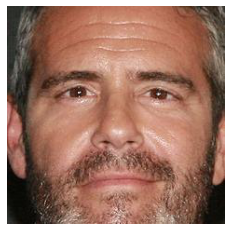

0
vip/data/m_012.jpg
1
2


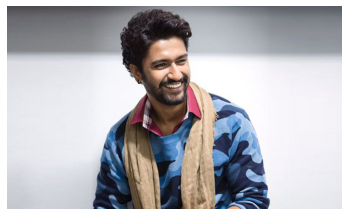

4
india_images/vikky15.jpg
2
1


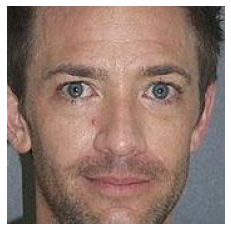

5
vip/data/m_091.jpg
1
2


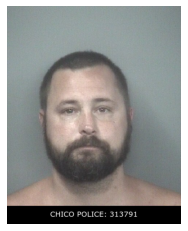

9
images/26.jpg
3
1


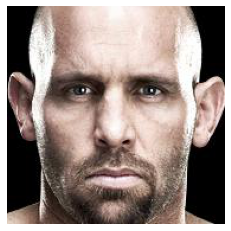

10
vip/data/m_511.jpg
1
3


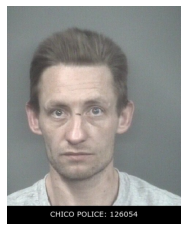

13
images/209.jpg
1
2


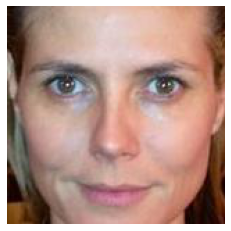

18
vip/data/f_166.jpg
0
1


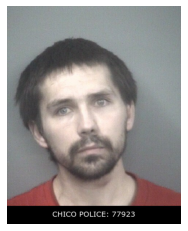

20
images/228.jpg
2
1


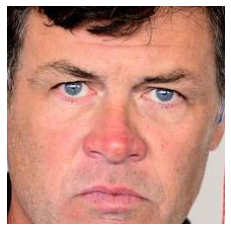

21
vip/data/m_335.jpg
2
1


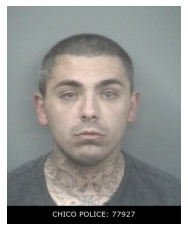

22
images/137.jpg
1
2


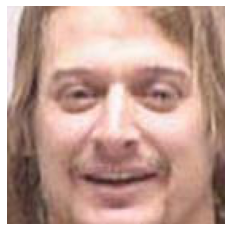

23
vip/data/m_276.jpg
2
1


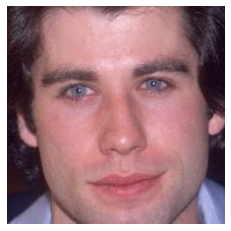

24
vip/data/m_239.jpg
1
2


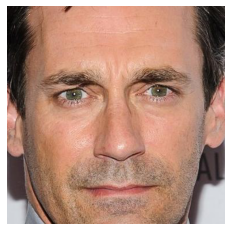

25
vip/data/m_242.jpg
1
2


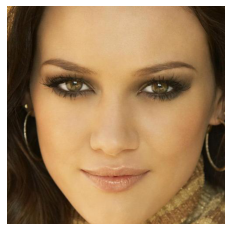

26
vip/data/f_170.jpg
0
1


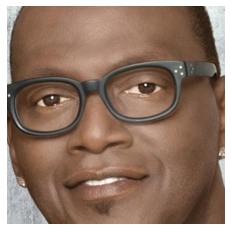

32
vip/data/m_385.jpg
2
3


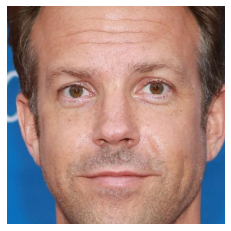

38
vip/data/m_201.jpg
1
2


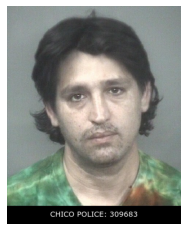

39
images/196.jpg
3
1


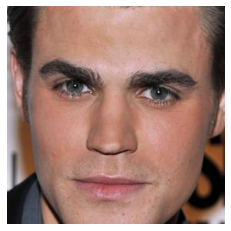

41
vip/data/m_362.jpg
2
1


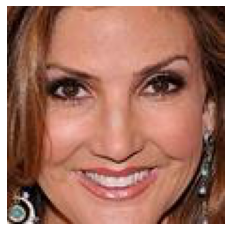

44
vip/data/f_164.jpg
3
1


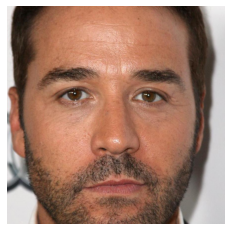

45
vip/data/m_211.jpg
2
1


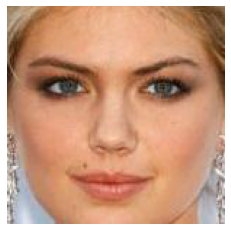

46
vip/data/f_243.jpg
0
1


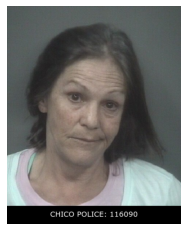

47
images/47.jpg
2
1


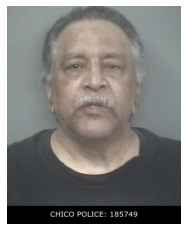

48
images/220.jpg
3
2


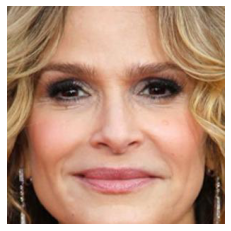

50
vip/data/f_292.jpg
0
1


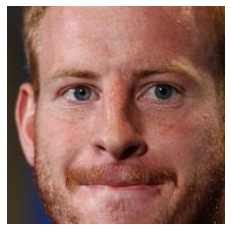

53
vip/data/m_042.jpg
3
2


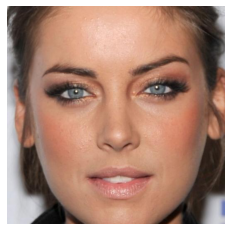

56
vip/data/f_213.jpg
1
0


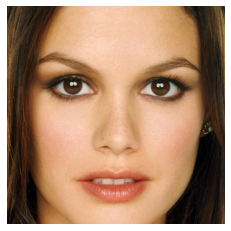

57
vip/data/f_413.jpg
0
1


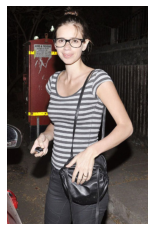

59
india_images/kalki1.jpg
1
0


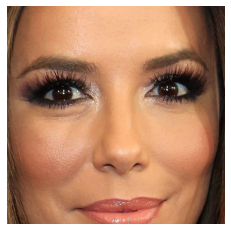

60
vip/data/f_130.jpg
0
1


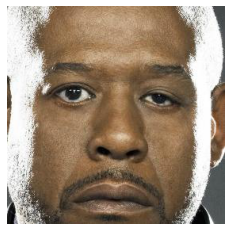

61
vip/data/m_132.jpg
3
2


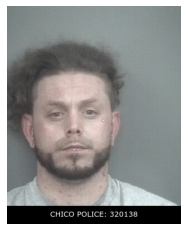

62
images/64.jpg
0
2


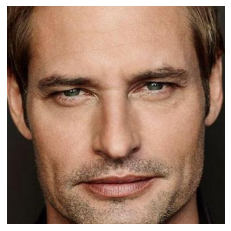

65
vip/data/m_253.jpg
1
2


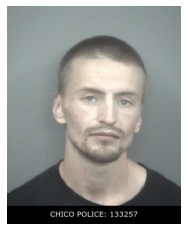

72
images/185.jpg
1
2


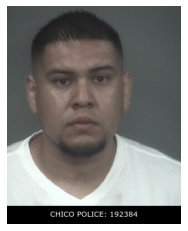

75
images/256.jpg
3
1


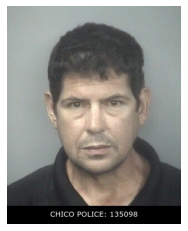

79
images/115.jpg
3
1


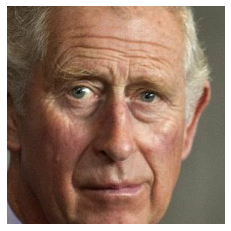

80
vip/data/m_378.jpg
3
1


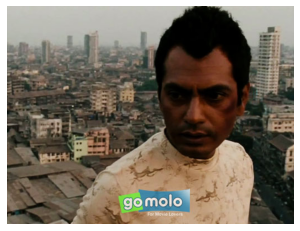

81
india_images/nawaz2.jpg
2
1


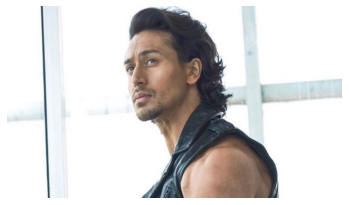

82
india_images/tiger4.jpg
2
1


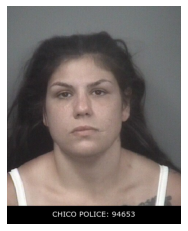

86
images/94.jpg
2
3


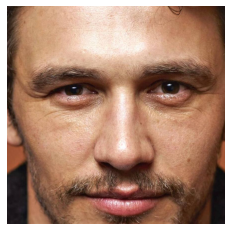

90
vip/data/m_181.jpg
2
1


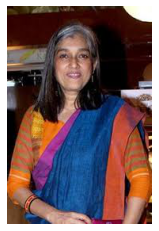

91
india_images/ratna1.jpeg
0
1


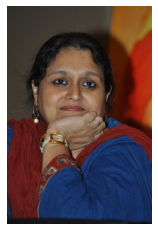

92
india_images/supriya2.jpg
1
2


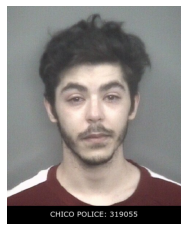

93
images/181.jpg
2
3


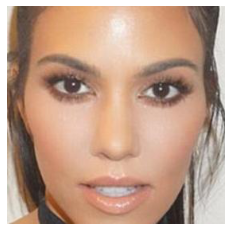

95
vip/data/f_281.jpg
0
1


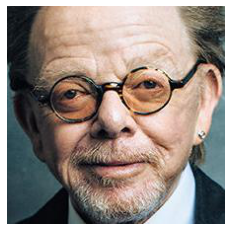

97
vip/data/m_364.jpg
0
2


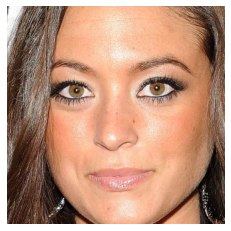

98
vip/data/f_441.jpg
0
1


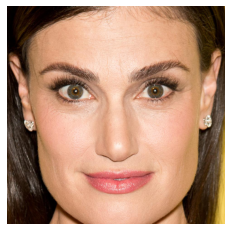

102
vip/data/f_173.jpg
0
1


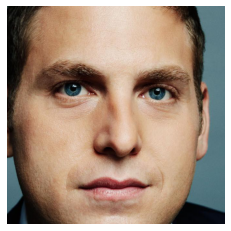

103
vip/data/m_245.jpg
1
3


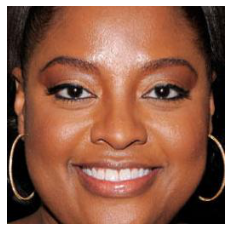

106
vip/data/f_462.jpg
1
3


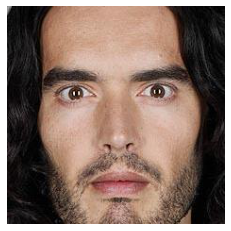

107
vip/data/m_409.jpg
0
1


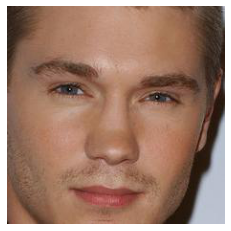

108
vip/data/m_047.jpg
2
1


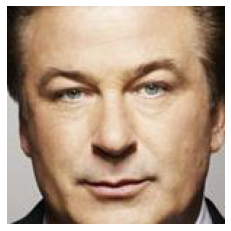

109
vip/data/m_008.jpg
3
2


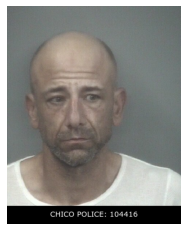

115
images/267.jpg
2
3


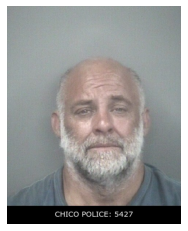

116
images/211.jpg
3
1


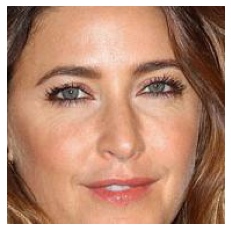

117
vip/data/f_321.jpg
0
1


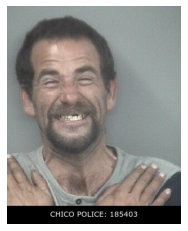

118
images/183.jpg
2
3


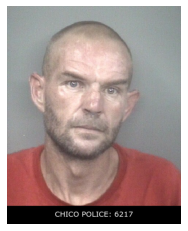

119
images/237.jpg
0
1


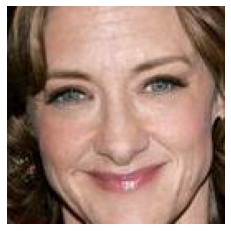

122
vip/data/f_218.jpg
2
1


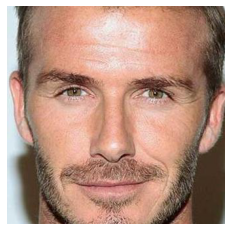

123
vip/data/m_088.jpg
0
1


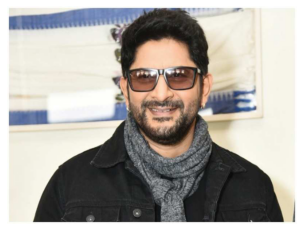

124
india_images/arshad9.jpg
2
1


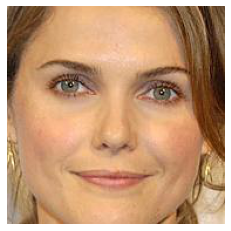

125
vip/data/f_268.jpg
0
1


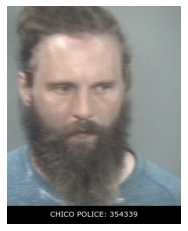

126
images/2.jpg
1
2


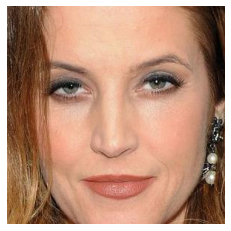

127
vip/data/f_320.jpg
0
1


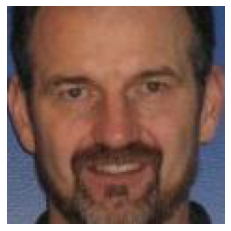

131
vip/data/m_067.jpg
2
1


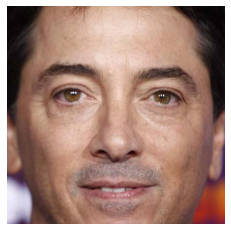

132
vip/data/m_421.jpg
2
1


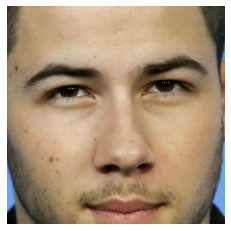

133
vip/data/m_348.jpg
2
1


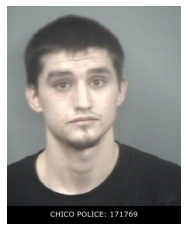

134
images/125.jpg
2
1


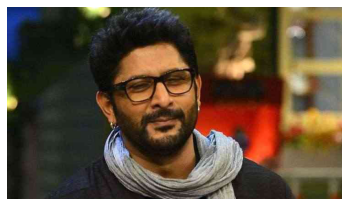

135
india_images/arshad8.jpeg
2
1


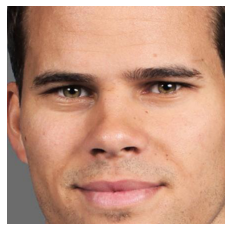

136
vip/data/m_281.jpg
1
2


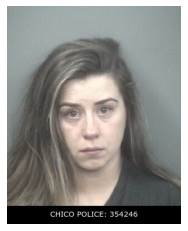

138
images/77.jpg
0
1


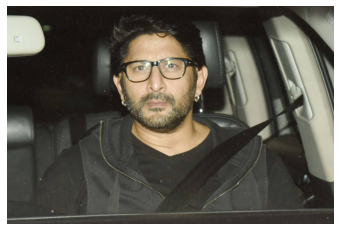

139
india_images/arshad15.jpg
2
1


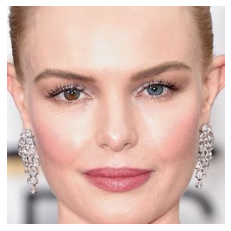

141
vip/data/f_238.jpg
0
1


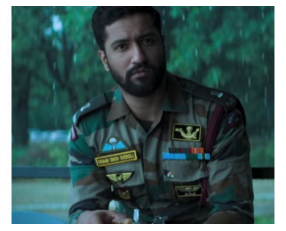

142
india_images/vikky17.jpg
2
1


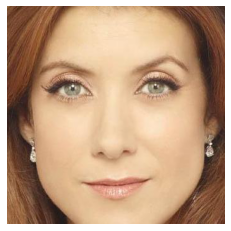

144
vip/data/f_244.jpg
3
1


In [31]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

y_df = all_data_df[ok.astype(bool)].reset_index(drop=True)

for i in range(len(test)):
    if y_pred[i].argmax() != y_test_c[i].argmax():
        img = mpimg.imread(y_df.loc[test[i]].path)
        plt.imshow(img) 
        plt.axis('off') 
        plt.show()
        print(i)
        print(y_df.loc[test[i]].path)
        print(y_pred[i].argmax())
        print(y_test_c[i].argmax())

**K-fold cross validation**

In [58]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=81000)

cvscores = []

for train, test in kfold.split(x_train_res, cy_train_res):
    
    CY = np.array(cy_train_res)
    CY = np.where(CY == "Underweight", '0', CY)
    CY = np.where(CY == 'Normalweight', '1', CY)
    CY = np.where(CY == 'Pre-obesity', '2', CY)
    CY = np.where(CY == "Obesity", '3', CY)
    CY = to_categorical(CY, num_classes = 4)
    
    model_c = Sequential()
    model_c.add(Dense(units=64, activation='tanh', input_dim=130))
    model_c.add(Dense(units=32, activation='tanh'))
    model_c.add(Dropout(0.2))
    model_c.add(Dense(units=8, activation='tanh'))
    model_c.add(Dropout(0.2))
    model_c.add(Dense(units=4, activation='softmax'))

    opt = optimizers.adam(lr=0.001)
    def top_2(y_true, y_pred):
        return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2)

    model_c.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['categorical_accuracy', top_2])
    
    model_c.fit(x_train_res[train], CY[train], epochs=15, batch_size=32)
    scores = model_c.evaluate(x_train_res[test], CY[test], verbose=0)
    print("%s: %.2f%%" % (model_c.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/15
2691/2691 [==============================] - 1s 337us/step - loss: 1.1263 - categorical_accuracy: 0.5217 - top_2: 0.7402
Epoch 2/15
2691/2691 [==============================] - 0s 97us/step - loss: 0.9187 - categorical_accuracy: 0.6262 - top_2: 0.8473
Epoch 3/15
2691/2691 [==============================] - 0s 96us/step - loss: 0.8138 - categorical_accuracy: 0.6819 - top_2: 0.8982
Epoch 4/15
2691/2691 [==============================] - 0s 94us/step - loss: 0.7470 - categorical_accuracy: 0.7087 - top_2: 0.9186
Epoch 5/15
2691/2691 [==============================] - 0s 98us/step - loss: 0.6537 - categorical_accuracy: 0.7703 - top_2: 0.9320
Epoch 6/15
2691/2691 [==============================] - 0s 108us/step - loss: 0.5910 - categorical_accuracy: 0.7867 - top_2: 0.9517
Epoch 7/15
2691/2691 [==============================] - 0s 112us/step - loss: 0.5379 - categorical_accuracy: 0.8168 - top_2: 0.9669
Epoch 8/15
2691/2691 [==============================] - 0s 114us/step - loss: 0.